### 선형 회귀 (Linear Regression)

- 독립적으로 변하는 독립변수 (x)
- 독립변수에 종속적으로 변하는 종속변수 (y)
    - 하나의 x값으로 y를 설명하는 : 단순 선형 회귀 (Simple Linear Regression)
    - 하나 이상의 x 값으로 y를 설명하는 : 다중 선형 회귀 (Multiple linear Regression)
    
    
- 선형 예측 함수를 사용하여 회귀식을 리모델리하여 예측한다.
- y= ax + b 일차함수 활용 
    - 기울기 a ( 최소제곱법)
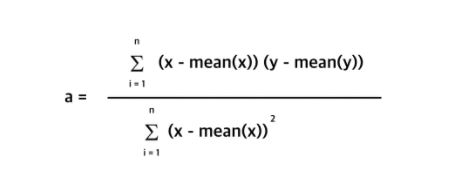
    - y 절편 b
    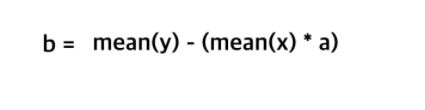

In [4]:
# 공부시간에 따라 점수가 높다
import numpy as np
# 학생 공부 시간
x=[2,4,6,8]
# 학생 시험 점수
y=[81,93,91,97]

mx=np.mean(x)
my=np.mean(y)

# 최소제곱법 분모 구하기
divisor = sum([(mx-i)**2 for i in x])

# 최소제곱법 분자 구하기
def top(x, mx, y, my):
    d=0
    for i in range(len(x)):
        d+=(x[i]-mx)*(y[i]-my)
    return d
dividend = top(x,mx,y,my)

# 기울기 구하기
a= dividend / divisor

# y 절편 구하기
b = my - (mx * a)


print('기울기 :',a)
print('y 절편 :',b)

기울기 : 2.3
y 절편 : 79.0


#### 오차 평가 방법
1. 평균 제곱근 오차(root mean square error)
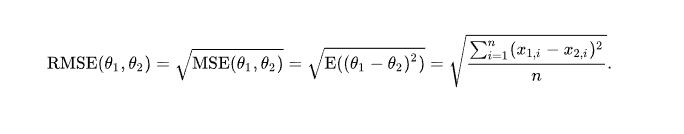

In [6]:
import numpy
# 기울기와 y 절편
ab= [3, 76]
data=[[2,81],[4,93],[6,91],[8,97]]
x=[i[0] for i in data]
y=[i[1] for i in data]

# 일차방적식 함수
def predict(x):
    return ab[0]*x + ab[1]

# 평균 제곱근
def rmse(p,a):
    return np.sqrt(((p-a)**2).mean())

# RMSE 함수를 각 y 값에 대입하여 최종 값을 구하는 함수
def rmse_val(predict_result, y):
    return rmse(np.array(predict_result), np.array(y))

# 예측값이 들어갈 빈 리스트
predict_result=[]

# 모든 x 값 대입
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print('공부한 시간=%.f, 실제 점수=%.f, 예측 점수=%.f'%(x[i], y[i], predict(x[i])))
    
# 최종 RMSE
print('rmse 최종값 : ' + str(rmse_val(predict_result, y)))


# 최종 오차 3.316 정도

공부한 시간=2, 실제 점수=81, 예측 점수=82
공부한 시간=4, 실제 점수=93, 예측 점수=88
공부한 시간=6, 실제 점수=91, 예측 점수=94
공부한 시간=8, 실제 점수=97, 예측 점수=100
rmse 최종값 : 3.3166247903554


#### 경사 하강법
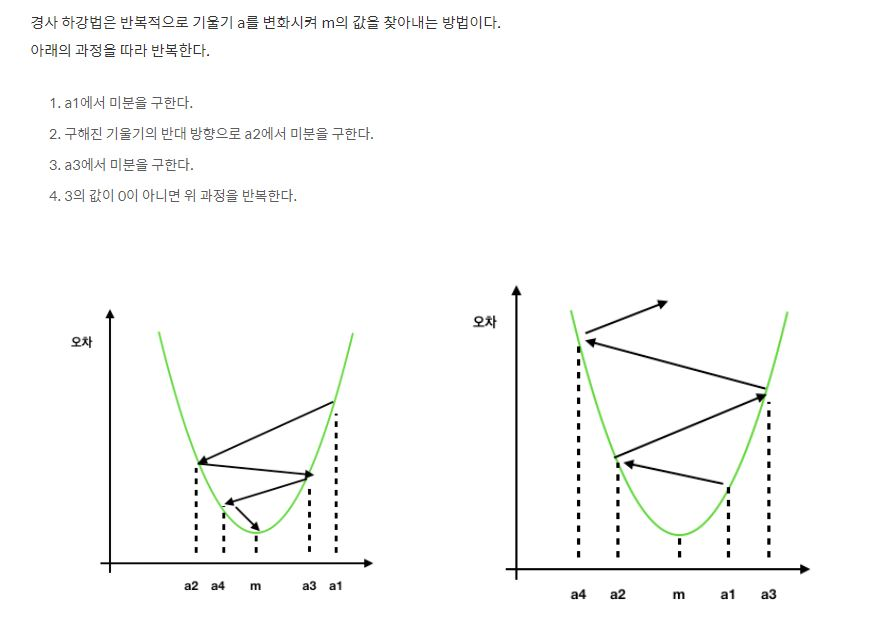
#### 오차의 변화에 따라 이차 함수 그래프를 만들고, 적절한 학습률을 설정하여 미분값이 0인 지점을 구하는 것!!!!


#### 학습률 (Learning Rate)
- 어느 만큼 이동시킬지 결정하는 것
- 학습률의 값을 적절히 바꾸는것이 중요하다
    - Keras 에서는 자동으로 조절해 줌


In [5]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

data=[[2,81],[4,93],[6,91],[8,97]]
x_data = [x_data[0] for x_data in data]
y_data = [y_data[1] for y_data in data]

learning_rate= 0.1
# random_uniform()
# 0에서 10 사이에서 임의의 수 1개를 만들고, 데이터 형식은 실수형, 같은 값이 나오도록 seed 설정
a=tf.Variable(tf.random.uniform([1], 0, 10, dtype= tf.float64, seed=0))
b=tf.Variable(tf.random.uniform([1], 0, 100, dtype= tf.float64, seed=0))

# 일차방적식 구현
y = a * x_data + b

# 평균 제곱근 오차 식
rmse= tf.sqrt(tf.reduce_mean(tf.square(y-y_data)))

# 경사하강법 결과 저장
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

with tf.Session() as sess:
    # 변수 초기화
    sess.run(tf.global_variables_initializer())
    # 2001 번 실행
    for step in range(2001):
        sess.run(gradient_decent)
        # 100 번 마다 결과 출력
        if step%100 ==0:
            print('Epoch: %.f, RMSE = %.04f, 기울기 a = %.4f, y 절편 b= %.4f'%(step,sess.run(rmse), sess.run(a), sess.run(b)))

Epoch: 0, RMSE = 30.2139, 기울기 a = 7.5235, y 절편 b= 80.5984
Epoch: 100, RMSE = 2.8860, 기울기 a = 2.2299, y 절편 b= 79.4181
Epoch: 200, RMSE = 2.8826, 기울기 a = 2.2601, y 절편 b= 79.2379
Epoch: 300, RMSE = 2.8815, 기울기 a = 2.2773, y 절편 b= 79.1353
Epoch: 400, RMSE = 2.8811, 기울기 a = 2.2871, y 절편 b= 79.0770
Epoch: 500, RMSE = 2.8810, 기울기 a = 2.2927, y 절편 b= 79.0438
Epoch: 600, RMSE = 2.8810, 기울기 a = 2.2958, y 절편 b= 79.0249
Epoch: 700, RMSE = 2.8810, 기울기 a = 2.2976, y 절편 b= 79.0142
Epoch: 800, RMSE = 2.8810, 기울기 a = 2.2987, y 절편 b= 79.0081
Epoch: 900, RMSE = 2.8810, 기울기 a = 2.2992, y 절편 b= 79.0046
Epoch: 1000, RMSE = 2.8810, 기울기 a = 2.2996, y 절편 b= 79.0026
Epoch: 1100, RMSE = 2.8810, 기울기 a = 2.2998, y 절편 b= 79.0015
Epoch: 1200, RMSE = 2.8810, 기울기 a = 2.2999, y 절편 b= 79.0008
Epoch: 1300, RMSE = 2.8810, 기울기 a = 2.2999, y 절편 b= 79.0005
Epoch: 1400, RMSE = 2.8810, 기울기 a = 2.3000, y 절편 b= 79.0003
Epoch: 1500, RMSE = 2.8810, 기울기 a = 2.3000, y 절편 b= 79.0002
Epoch: 1600, RMSE = 2.8810, 기울기 a = 2.3000, y 절편 b=

#### 텐서플로는 session 함수를 이용해 구동에 필요한 리소스를 컴퓨터에 할당한다.
- Session 이 할당되면 session.run('그래프명')의 형식으로 해당 함수를 구동시킨다.
- global_variables_initializer()는 변수를 초기화하는 함수
- 앞서 만든 gradient_descent를 총 필요한 수 만큼 반복하여 실행

### 결과 분석
기울기는 2.3 으로 수렴하고 y 절편은 79로 수렴하는 것을 확인할 수 있다.\

### 다중선형 회귀
- 더 정확한 예측을 위해서는 추가 정보를 입력해야 하며, 새로운 예측 값을 구하려면 변수의 개수를 늘려야 한다.

In [10]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# 기존 학생 data Set 에 과외 수업 횟수 추가
data=[[2,0,81],[4,4,93],[6,2,91],[8,3,97]]
x1= [x_row1[0] for x_row1 in data]
x2= [x_row2[1] for x_row2 in data]
y_data = [y_row[2] for y_row in data]

a1 = tf.Variable(tf.random.uniform([1],0,10, dtype=tf.float64, seed=0))
a2 = tf.Variable(tf.random.uniform([1],0,10, dtype=tf.float64, seed=0))
b= tf.Variable(tf.random.uniform([1],0,100, dtype=tf.float64, seed=0))

y= (a1*x1) + (a2 *x2) + b

# RMSE 함수
rmse = tf.sqrt(tf.reduce_mean(tf.square(y-y_data)))
learning_rate=0.1

# RMSE 값을 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

# 학습이 진행되는 부분
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        sess.run(gradient_decent)
        if step%100==0:
            print('Epoch: %.f, RMSE = %.04f, 기울기 a1 = %.4f,기울기 a2 = %.4f, y 절편 b= %.4f'%(step, sess.run(rmse), sess.run(a1), sess.run(a2), sess.run(b)))


Epoch: 0, RMSE = 49.1842, 기울기 a1 = 7.5270,기울기 a2 = 7.8160, y 절편 b= 80.5980
Epoch: 100, RMSE = 1.8368, 기울기 a1 = 1.1306,기울기 a2 = 2.1316, y 절편 b= 78.5119
Epoch: 200, RMSE = 1.8370, 기울기 a1 = 1.1879,기울기 a2 = 2.1487, y 절편 b= 78.1057
Epoch: 300, RMSE = 1.8370, 기울기 a1 = 1.2122,기울기 a2 = 2.1571, y 절편 b= 77.9352
Epoch: 400, RMSE = 1.8370, 기울기 a1 = 1.2226,기울기 a2 = 2.1607, y 절편 b= 77.8636
Epoch: 500, RMSE = 1.8370, 기울기 a1 = 1.2269,기울기 a2 = 2.1622, y 절편 b= 77.8335
Epoch: 600, RMSE = 1.8370, 기울기 a1 = 1.2288,기울기 a2 = 2.1628, y 절편 b= 77.8208
Epoch: 700, RMSE = 1.8370, 기울기 a1 = 1.2295,기울기 a2 = 2.1631, y 절편 b= 77.8155
Epoch: 800, RMSE = 1.8370, 기울기 a1 = 1.2299,기울기 a2 = 2.1632, y 절편 b= 77.8133
Epoch: 900, RMSE = 1.8370, 기울기 a1 = 1.2300,기울기 a2 = 2.1632, y 절편 b= 77.8124
Epoch: 1000, RMSE = 1.8370, 기울기 a1 = 1.2301,기울기 a2 = 2.1633, y 절편 b= 77.8120
Epoch: 1100, RMSE = 1.8370, 기울기 a1 = 1.2301,기울기 a2 = 2.1633, y 절편 b= 77.8118
Epoch: 1200, RMSE = 1.8370, 기울기 a1 = 1.2301,기울기 a2 = 2.1633, y 절편 b= 77.8117
Epoch: 130

---

In [11]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

data=[[2,0],[4,0],[6,0],[8,1],[10,1],[12,1],[14,1]]
x_data = [x_row[0] for x_row in data]
y_data = [y_row[1] for y_row in data]

a=tf.Variable(tf.random.normal([1], dtype=tf.float64, seed=0))
b=tf.Variable(tf.random.normal([1], dtype=tf.float64, seed=0))

# 시그모어드 함수 방정식 구현
y = 1/(1+np.e**(a*x_data + b))
    
# 로그 함수 구현
loss = -tf.reduce_mean(np.array(y_data) * tf.log(y) + (1-np.array(y_data)) * tf.log(1-y))

learning_rate=0.5
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(60001):
        sess.run(gradient_decent)
        if i%6000==0:
            print('Epoch : %.f, loss = %.4f, 기울기 a= %.4f, y절편 = %.4f'%(i,sess.run(loss), sess.run(a), sess.run(b)))

Epoch : 0, loss = 1.2676, 기울기 a= 0.1849, y절편 = -0.4334
Epoch : 6000, loss = 0.0152, 기울기 a= -2.9211, y절편 = 20.2982
Epoch : 12000, loss = 0.0081, 기울기 a= -3.5637, y절편 = 24.8010
Epoch : 18000, loss = 0.0055, 기울기 a= -3.9557, y절편 = 27.5463
Epoch : 24000, loss = 0.0041, 기울기 a= -4.2380, y절편 = 29.5231
Epoch : 30000, loss = 0.0033, 기울기 a= -4.4586, y절편 = 31.0675
Epoch : 36000, loss = 0.0028, 기울기 a= -4.6396, y절편 = 32.3346
Epoch : 42000, loss = 0.0024, 기울기 a= -4.7930, y절편 = 33.4086
Epoch : 48000, loss = 0.0021, 기울기 a= -4.9261, y절편 = 34.3406
Epoch : 54000, loss = 0.0019, 기울기 a= -5.0436, y절편 = 35.1636
Epoch : 60000, loss = 0.0017, 기울기 a= -5.1489, y절편 = 35.9005
